# Data Exploration

This notebook explores the sentiment analysis datasets: IMDB, SST-2, and Yelp.

## Objectives
- Understand dataset distributions
- Analyze text characteristics
- Check class balance
- Visualize data statistics


In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from src.data.dataset_loader import IMDBDataLoader, YelpDataLoader, SST2Loader
from src.data.preprocess import clean_text

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

%matplotlib inline


/Users/seunghwanchoi/miniforge3/envs/sentiment-analysis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. IMDB Dataset


In [2]:
# Load IMDB data
imdb_loader = IMDBDataLoader('../IMDB Dataset.csv')
imdb_texts, imdb_labels = imdb_loader.load(binary=True)

print(f"IMDB Dataset:")
print(f"Total samples: {len(imdb_texts)}")
print(f"Positive samples: {sum(imdb_labels)}")
print(f"Negative samples: {len(imdb_labels) - sum(imdb_labels)}")
print(f"Class balance: {np.mean(imdb_labels):.2%} positive")


IMDB Dataset:
Total samples: 50000
Positive samples: 25000
Negative samples: 25000
Class balance: 50.00% positive


/var/folders/lb/hsgx9s3s1sb282vw9s4gnrvr0000gn/T/ipykernel_70517/2571761081.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([pos_lengths, neg_lengths], labels=['Positive', 'Negative'])


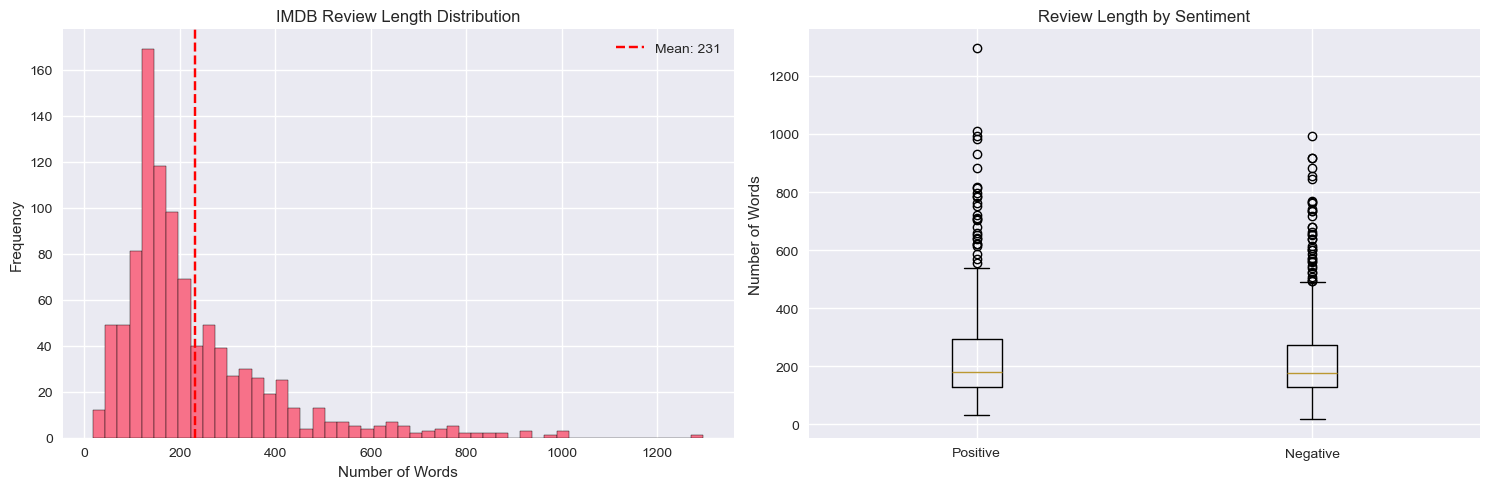

In [3]:
# Analyze text lengths
imdb_lengths = [len(text.split()) for text in imdb_texts[:1000]]  # Sample for speed

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(imdb_lengths, bins=50, edgecolor='black')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('IMDB Review Length Distribution')
axes[0].axvline(np.mean(imdb_lengths), color='r', linestyle='--', label=f'Mean: {np.mean(imdb_lengths):.0f}')
axes[0].legend()

# Box plot by sentiment
pos_lengths = [len(text.split()) for text, label in zip(imdb_texts[:1000], imdb_labels[:1000]) if label == 1]
neg_lengths = [len(text.split()) for text, label in zip(imdb_texts[:1000], imdb_labels[:1000]) if label == 0]

axes[1].boxplot([pos_lengths, neg_lengths], labels=['Positive', 'Negative'])
axes[1].set_ylabel('Number of Words')
axes[1].set_title('Review Length by Sentiment')

plt.tight_layout()
plt.show()


## 2. SST-2 Dataset


In [4]:
# Load SST-2 data
sst2_path = Path('../archive (5)/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank')
sst2_loader = SST2Loader(sst2_path)
sst2_train_texts, sst2_train_labels, sst2_val_texts, sst2_val_labels, sst2_test_texts, sst2_test_labels = sst2_loader.load()

print(f"SST-2 Dataset:")
print(f"Train samples: {len(sst2_train_texts)}")
print(f"Val samples: {len(sst2_val_texts)}")
print(f"Test samples: {len(sst2_test_texts)}")
print(f"Train class balance: {np.mean(sst2_train_labels):.2%} positive")


SST-2 Dataset:
Train samples: 8544
Val samples: 1101
Test samples: 2210
Train class balance: 55.24% positive


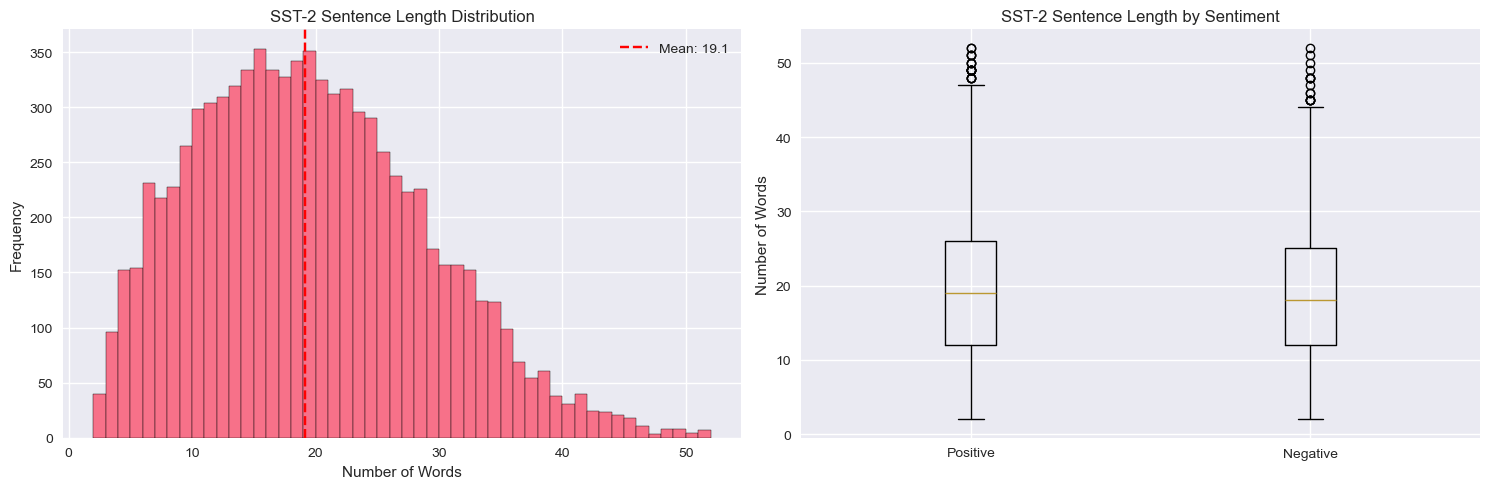

In [7]:
# Analyze SST-2 sentence lengths
sst2_lengths = [len(text.split()) for text in sst2_train_texts]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(sst2_lengths, bins=50, edgecolor='black')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('SST-2 Sentence Length Distribution')
axes[0].axvline(np.mean(sst2_lengths), color='r', linestyle='--', label=f'Mean: {np.mean(sst2_lengths):.1f}')
axes[0].legend()

# Box plot by sentiment
pos_lengths = [len(text.split()) for text, label in zip(sst2_train_texts, sst2_train_labels) if label == 1]
neg_lengths = [len(text.split()) for text, label in zip(sst2_train_texts, sst2_train_labels) if label == 0]

axes[1].boxplot([pos_lengths, neg_lengths], tick_labels=['Positive', 'Negative'])
axes[1].set_ylabel('Number of Words')
axes[1].set_title('SST-2 Sentence Length by Sentiment')

plt.tight_layout()
plt.show()


## 3. Yelp Dataset


In [5]:
# Load Yelp data (sample)
yelp_loader = YelpDataLoader('../archive (7)/yelp_academic_dataset_review.json')
yelp_texts, yelp_labels = yelp_loader.load(sample_size=10000, binary=True)

print(f"Yelp Dataset (10k sample):")
print(f"Total samples: {len(yelp_texts)}")
print(f"Positive samples: {sum(yelp_labels)}")
print(f"Negative samples: {len(yelp_labels) - sum(yelp_labels)}")
print(f"Class balance: {np.mean(yelp_labels):.2%} positive")


Yelp Dataset (10k sample):
Total samples: 10000
Positive samples: 8158
Negative samples: 1842
Class balance: 81.58% positive


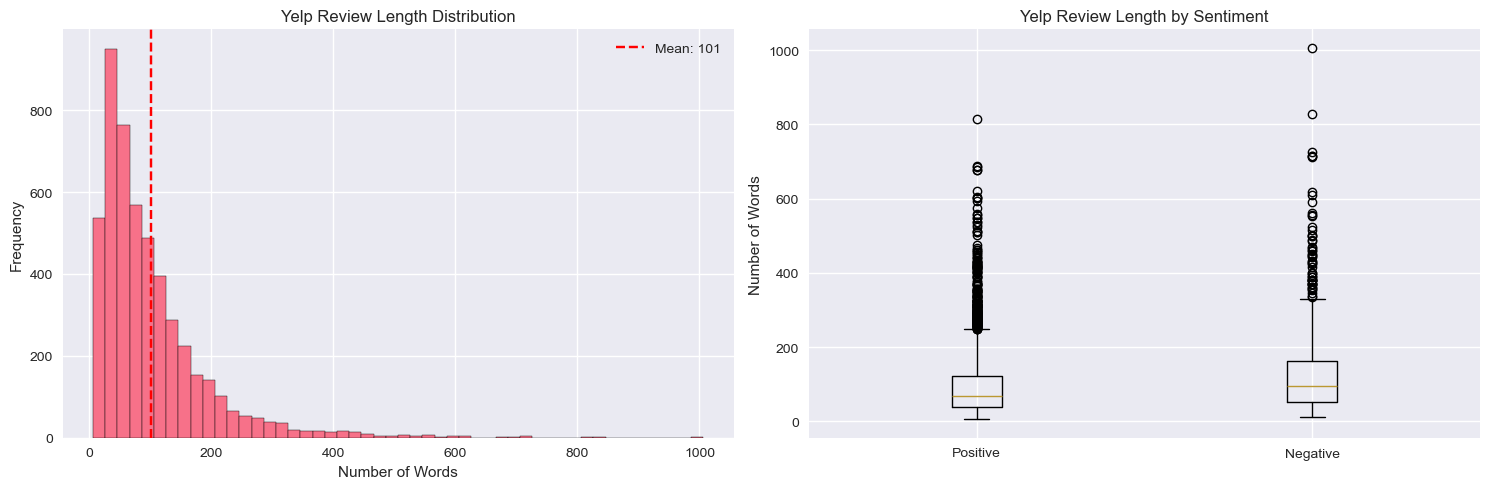

In [8]:
# Analyze Yelp review lengths
yelp_lengths = [len(text.split()) for text in yelp_texts[:5000]]  # Sample for speed

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(yelp_lengths, bins=50, edgecolor='black')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Yelp Review Length Distribution')
axes[0].axvline(np.mean(yelp_lengths), color='r', linestyle='--', label=f'Mean: {np.mean(yelp_lengths):.0f}')
axes[0].legend()

# Box plot by sentiment
pos_lengths = [len(text.split()) for text, label in zip(yelp_texts[:5000], yelp_labels[:5000]) if label == 1]
neg_lengths = [len(text.split()) for text, label in zip(yelp_texts[:5000], yelp_labels[:5000]) if label == 0]

axes[1].boxplot([pos_lengths, neg_lengths], tick_labels=['Positive', 'Negative'])
axes[1].set_ylabel('Number of Words')
axes[1].set_title('Yelp Review Length by Sentiment')

plt.tight_layout()
plt.show()


## 4. Dataset Comparison


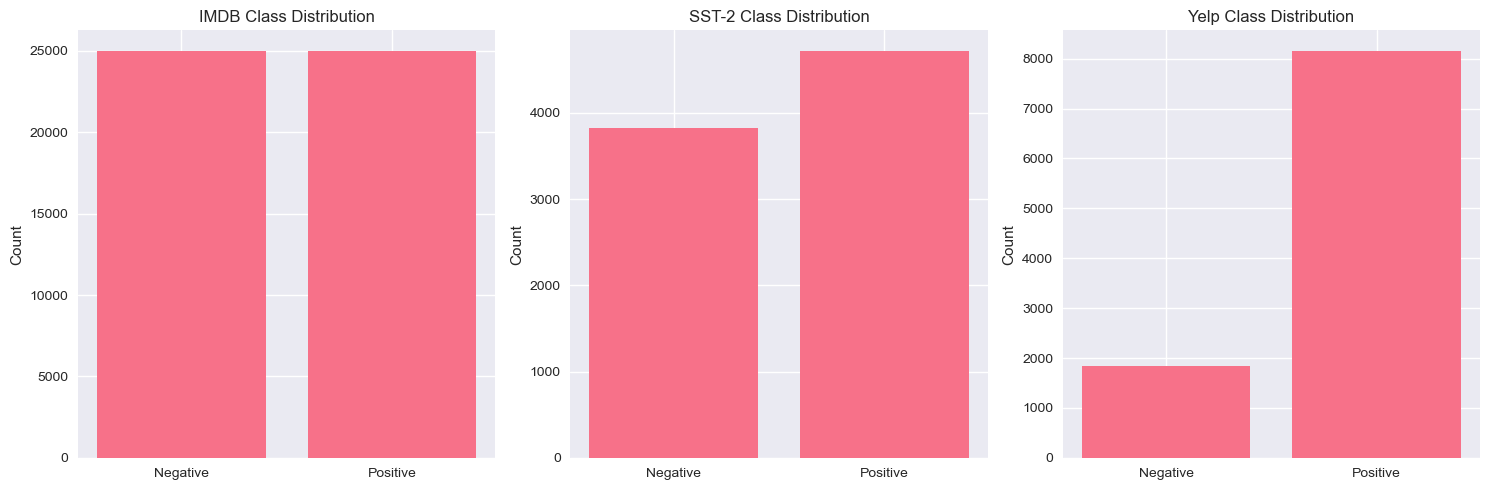

In [6]:
# Visualize class distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

datasets = [
    ('IMDB', imdb_labels),
    ('SST-2', sst2_train_labels),
    ('Yelp', yelp_labels)
]

for idx, (name, labels) in enumerate(datasets):
    pos_count = sum(labels)
    neg_count = len(labels) - pos_count
    axes[idx].bar(['Negative', 'Positive'], [neg_count, pos_count])
    axes[idx].set_title(f'{name} Class Distribution')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()
